### IMPORT ALL THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import StandardScaler

###IMPORT THE DATASET

In [2]:
# Load the data
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Read the uploaded file into a DataFrame
data = pd.read_csv(filename)

Saving Accidental_Drug_Related_Deaths.csv to Accidental_Drug_Related_Deaths.csv


In [3]:
#Convert into a dataframe
df = pd.DataFrame(data)
df

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,02/28/2023,Date of death,58.0,Female,White,"No, not Spanish/Hispanic/Latino",NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,N,NaN,"NEW HAVEN, CT\n(41.3082517, -72.9241605)","NEW HAVEN, CT\n(41.3082517, -72.9241605)","CT\n(41.57350273, -72.738305908)"
11977,08/23/2023,Date of death,23.0,Male,White,"Yes, Mexican, Mexican American, Chicano",NEW HAVEN,NEW HAVEN,CT,NEW HAVEN,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"NEW HAVEN, CT\n(41.3082517, -72.9241605)","NEW HAVEN, CT\n(41.3082517, -72.9241605)","CT\n(41.57350273, -72.738305908)"
11978,01/30/2023,Date of death,46.0,Male,White,"No, not Spanish/Hispanic/Latino",DANBURY,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"DANBURY, CT\n(41.393666, -73.451539)","DANBURY, CT\n(41.393666, -73.451539)","CT\n(41.57350273, -72.738305908)"
11979,09/25/2023,Date of death,44.0,Male,White,"Yes, other Spanish/Hispanic/Latino",HARTFORD,HARTFORD,CT,HARTFORD,...,Y,NaN,NaN,NaN,NaN,Y,NaN,"HARTFORD, CT\n(41.765775, -72.673356)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.57350273, -72.738305908)"


In [4]:
#Datatypes overview of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11981 entries, 0 to 11980
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           11981 non-null  object 
 1   Date Type                      11981 non-null  object 
 2   Age                            11979 non-null  float64
 3   Sex                            11972 non-null  object 
 4   Race                           11924 non-null  object 
 5   Ethnicity                      2565 non-null   object 
 6   Residence City                 11385 non-null  object 
 7   Residence County               10721 non-null  object 
 8   Residence State                9993 non-null   object 
 9   Injury City                    11803 non-null  object 
 10  Injury County                  8647 non-null   object 
 11  Injury State                   8952 non-null   object 
 12  Injury Place                   11623 non-null 

In [5]:
# Display missing values for each attribute
missing_values = data.isnull().sum()

missing_summary = pd.DataFrame({
    'Attribute': missing_values.index,
    'Missing Values': missing_values.values
})

# Display the result
print(missing_summary)

                        Attribute  Missing Values
0                            Date               0
1                       Date Type               0
2                             Age               2
3                             Sex               9
4                            Race              57
5                       Ethnicity            9416
6                  Residence City             596
7                Residence County            1260
8                 Residence State            1988
9                     Injury City             178
10                  Injury County            3334
11                   Injury State            3029
12                   Injury Place             358
13          Description of Injury             807
14                     Death City            2784
15                   Death County            3891
16                    Death State            5108
17                       Location            1349
18              Location if Other           10787


In [6]:
data.describe()

,Age
count,11979.000000
mean,44.011186
std,12.678870
min,13.000000
25%,34.000000
50%,44.000000
75%,54.000000
max,87.000000


In [7]:
# Check skewness of the Age column
print(f"Skewness of Age: {data['Age'].skew()}")

Skewness of Age: 0.05189733904434092


In [8]:
# Display numerical attributes
numerical_attributes = data.select_dtypes(include=['int64', 'float64'])
print("Numerical Attributes:\n", numerical_attributes.columns.tolist())

# Display categorical attributes
categorical_attributes = data.select_dtypes(include=['object', 'category'])
print("Categorical Attributes:\n", categorical_attributes.columns.tolist())

Numerical Attributes:
 ['Age']
Categorical Attributes:
 ['Date', 'Date Type', 'Sex', 'Race', 'Ethnicity', 'Residence City', 'Residence County', 'Residence State', 'Injury City', 'Injury County', 'Injury State', 'Injury Place', 'Description of Injury', 'Death City', 'Death County', 'Death State', 'Location', 'Location if Other', 'Cause of Death', 'Manner of Death', 'Other Significant Conditions ', 'Heroin', 'Heroin death certificate (DC)', 'Cocaine', 'Fentanyl', 'Fentanyl Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine', 'Amphet', 'Tramad', 'Hydromorphone', 'Morphine (Not Heroin)', 'Xylazine', 'Gabapentin', 'Opiate NOS', 'Heroin/Morph/Codeine', 'Other Opioid', 'Any Opioid', 'Other', 'ResidenceCityGeo', 'InjuryCityGeo', 'DeathCityGeo']


##DATA PREPROCESSING

**1. DATA CLEANING**

####i) DROP COLUMNS  & HANDLING MISSING VALUES

In [9]:
# Load the dataset
df = pd.read_csv("Accidental_Drug_Related_Deaths.csv")

# Dropping redundant and futile columns
df.drop(
    labels=["Other Opioid","Ethnicity","Location if Other","Cause of Death", "Any Opioid", "Residence State", "Injury State", "Death State", "Manner of Death", "Injury Place"],
    axis=1,
    inplace=True
)

# Fill missing values for specific columns
missing_fill_values = {
    "Sex": "Unknown",
    "Race": "Unknown",
    "Location": "Unknown",
    "Other": "Not Specified",
    "ResidenceCityGeo": "Unknown",
    "InjuryCityGeo": "Unkown",
    "DeathCityGeo": "Unknown",
    "Other Significant Conditions ": "Not Specified",
    "Residence City": "Unknown",
    "Injury City": "Unknown",
    "Death City": "Unknown",
    "Residence County": "Unknown",
    "Injury County": "Unknown",
    "Death County": "Unknown"
}

# Apply the filling operation for the selected columns
for column, fill_value in missing_fill_values.items():
    if column in data.columns:
        df[column] = df[column].fillna(fill_value)

# Fill missing values for Age with median
if "Age" in df.columns:
    df["Age"] = df["Age"].fillna(df["Age"].median())

# Confirm missing values are handled
print("Missing Values after handling:\n", df.isnull().sum())

# Save the cleaned dataset
df.to_excel("Dropped_Handled_Drug_Overdose_Data.xlsx", index=False)

Missing Values after handling:
 Date                                 0
Date Type                            0
Age                                  0
Sex                                  0
Race                                 0
Residence City                       0
Residence County                     0
Injury City                          0
Injury County                        0
Description of Injury              807
Death City                           0
Death County                         0
Location                             0
Other Significant Conditions         0
Heroin                            8403
Heroin death certificate (DC)    11241
Cocaine                           7403
Fentanyl                          3932
Fentanyl Analogue                11007
Oxycodone                        10965
Oxymorphone                      11819
Ethanol                           8780
Hydrocodone                      11812
Benzodiazepine                    9264
Methadone                       

####ii) HANDLING DUPLICATES

In [10]:
# Identify Duplicated Rows
duplicates= data.duplicated()

# Return true for duplicated rows
num_duplicates = duplicates.sum()

# Print the number of duplicated rows
print(f"Number of Duplicated Rows {num_duplicates}")

Number of Duplicated Rows 0


####iii) REMOVING WHITESPACES

In [11]:
# Load the dataset
data_nowspace = pd.read_excel("Dropped_Handled_Drug_Overdose_Data.xlsx")

#Removing WhiteSpace
#Step 1: Trim Whitespace from col
data_nowspace =data.copy()

#Step 2: Trim Whitespace from Rows
data_nowspace.replace(to_replace={'Title':r'\s+'}, value='_', regex=True, inplace=True)

####iv) RENAME COLUMNS

In [12]:
# Load the dataset
data_nowspace = pd.read_excel("Dropped_Handled_Drug_Overdose_Data.xlsx")

# Rename the "Location" column to "Death Place"
data_nowspace.rename(columns={"Location": "Death Place"}, inplace=True)

# Save the cleaned dataset
data_nowspace.to_excel("Renamed_Accidental_drug_deaths.xlsx", index=False)

v) FILL MISSING VALUES IN SUBSTANCE DETAILS WITH "N/F"

In [13]:
# Load the dataset
df = pd.read_excel("Renamed_Accidental_drug_deaths.xlsx")

# List of substance columns
substance_columns = [
    "Heroin", "Heroin death certificate (DC)", "Cocaine", "Fentanyl", "Fentanyl Analogue",
    "Oxycodone", "Oxymorphone", "Ethanol", "Hydrocodone", "Benzodiazepine", "Methadone",
    "Meth/Amphetamine", "Amphet", "Tramad", "Hydromorphone", "Morphine (Not Heroin)",
    "Xylazine", "Gabapentin", "Opiate NOS", "Heroin/Morph/Codeine"
]

# Replace blank cells with 'N/F'
df[substance_columns] = df[substance_columns].fillna("N/F")

# Save the cleaned dataset
df.to_excel("Filled_Accidental_drug_deaths.xlsx", index=False)

# Confirm missing values are handled
print("Missing Values after handling:\n", df.isnull().sum())

Missing Values after handling:
 Date                               0
Date Type                          0
Age                                0
Sex                                0
Race                               0
Residence City                     0
Residence County                   0
Injury City                        0
Injury County                      0
Description of Injury            807
Death City                         0
Death County                       0
Death Place                        0
Other Significant Conditions       0
Heroin                             0
Heroin death certificate (DC)      0
Cocaine                            0
Fentanyl                           0
Fentanyl Analogue                  0
Oxycodone                          0
Oxymorphone                        0
Ethanol                            0
Hydrocodone                        0
Benzodiazepine                     0
Methadone                          0
Meth/Amphetamine                   0
Amphet

vi) OUTLIER DETECTION

In [14]:
# Selecting the numerical column 'Age'
numerical_columns = ['Age']

# Convert 'Age' column to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Compute IQR for Outlier Detection
Q1 = df['Age'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['Age'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

# Display the youngest and oldest ages
youngest = df['Age'].min()
oldest = df['Age'].max()

print(f"Youngest Victim: {youngest}")
print(f"Oldest Victim: {oldest}")

# Display detected outliers
print("Outliers Detected:")
print(outliers[['Age']])

Youngest Victim: 13
Oldest Victim: 87
Outliers Detected:
      Age
8314   87


vii) DATA MAPPING:

In [15]:
# Load the dataset
df = pd.read_excel("Filled_Accidental_drug_deaths.xlsx")

# Define the mapping dictionary for "Race"
mapping_race = {
    "Asian/Indian": "Asian",
    "Asian, Other": "Asian",
    "Asian Indian": "Asian",
    "Black or African American": "Black",
    "Black or African American / American Indian Lenni Lenape": "Black",
    "Native American, Other": "American",
    "American Indian or Alaska Native": "American or Alaskan",
    "Other (Specify) Haitian": "Other",
    "Other (Specify) portugese, Cape Verdean": "Other",
    "Other (Specify) Puerto Rican": "Other",
    "Other Asian": "Asian",
    "Other Asian (Specify)": "Asian",
    "Blanks": "Unknown"
}

# Apply the mapping to the "Race" column
df["Race"] = df["Race"].replace(mapping_race)

# Rename "Location" column to "Death Place"
df.rename(columns={"Location": "Death Place"}, inplace=True)

# Define the mapping dictionary for "Death Place"
mapping_death_place = {
    "Decedentâ€™s Home": "Decedent's Home",
    "Decedent’s Home": "Decedent's Home",
    "Hiospital": "Hospital",
    "Hospice Facility": "Hospice",
    "Other (Specify)": "Other"
}

# Apply the mapping to the "Death Place" column
df["Death Place"] = df["Death Place"].replace(mapping_death_place)

# List of drug presence columns
drug_columns = [
    "Heroin", "Heroin death certificate (DC)", "Cocaine", "Fentanyl", "Fentanyl Analogue",
    "Oxycodone", "Oxymorphone", "Ethanol", "Hydrocodone", "Benzodiazepine", "Methadone",
    "Meth/Amphetamine", "Amphet", "Tramad", "Hydromorphone", "Morphine (Not Heroin)",
    "Xylazine", "Gabapentin", "Opiate NOS", "Heroin/Morph/Codeine"
]

# Replace blank cells with 0 and 'Y' with 1, all else becomes NaN → convert to 0
df[drug_columns] = df[drug_columns].replace({"Y": 1}).fillna(0)

# Convert all values to integers, setting non-numeric values to 0
df[drug_columns] = df[drug_columns].apply(pd.to_numeric, errors="coerce").fillna(0).astype(int)

# Apply the mapping to the "Description of Injury" column
df["Race"] = df["Race"].replace(mapping_race)


# Save the cleaned dataset
df.to_excel("Cleaned_v1_Accidental_drug_deaths.xlsx", index=False)


In [16]:
# Load the dataset
df = pd.read_excel("Cleaned_v1_Accidental_drug_deaths.xlsx")

# Define mapping for different categories of drug use and related features
Description_of_Injury_mapping = {
    # Drug Use (General)
    "Drug use": "Drug Use (General)",
    "Used Drugs": "Drug Use (General)",
    "Drug Abuse": "Drug Use (General)",
    "drug use": "Drug Use (General)",
    "multiple drug use": "Drug Use (General)",
    "Used illicit drugs": "Drug Use (General)",
    "Used Opiates": "Drug Use (General)",
    "DrugUse": "Drug Use (General)",
    "Used illicit and prescription drugs": "Drug Use (General)",
    "Substance use disorder": "Drug Use (General)",

    # Specific Drug Use - Cocaine
    "Used Cocaine": "Cocaine Use",
    "Cocaine use": "Cocaine Use",
    "Used cocaine": "Cocaine Use",
    "Recent cocaine use": "Cocaine Use",
    "Usage of Cocaine and Heroin": "Cocaine & Heroin Use",
    "Used Cocaine and Heroin": "Cocaine & Heroin Use",
    "Took cocaine": "Cocaine Use",

    # Specific Drug Use - Heroin
    "Used Heroin": "Heroin Use",
    "Heroin Overdose": "Heroin Use",
    "Heroin use": "Heroin Use",
    "Acute Heroin Toxicity": "Heroin Use",

    # Specific Drug Use - Fentanyl
    "Used fentanyl": "Fentanyl Use",
    "Took fentanyl": "Fentanyl Use",
    "Fentanyl Use": "Fentanyl Use",
    "Took Fentanyl and Ethanol": "Fentanyl & Alcohol Use",
    "Misuse of Fentanyl Patch": "Fentanyl Use",

    # Specific Drug Use - Methadone
    "Used Methadone": "Methadone Use",
    "Used methadone": "Methadone Use",
    "Used Methanone and Ethanol": "Methadone & Alcohol Use",

    # Specific Drug Use - Oxycodone
    "Used Oxycodone": "Oxycodone Use",
    "Ingested Oxycodone and Alcohol": "Oxycodone & Alcohol Use",
    "Used oxycodone": "Oxycodone Use",

    # Specific Drug Use - Morphine
    "Used Morphine and Ethanol": "Morphine & Alcohol Use",
    "USED MORPHINE": "Morphine Use",

    # Specific Drug Use - Hydrocodone
    "Used Hydrocodone": "Hydrocodone Use",
    "Used Methadone and Hydrocodone": "Methadone & Hydrocodone Use",

    # Specific Drug Use - Benzodiazepines
    "Fentanyl and Benzodiazepine Use": "Benzodiazepine Use",
    "Alcohol and Benzodiazepine use": "Benzodiazepine & Alcohol Use",

    # Prescription/Medication Abuse
    "Prescription Medicine Abuse": "Prescription Abuse",
    "Prescription drug use": "Prescription Abuse",
    "Abused prescription medications": "Prescription Abuse",
    "Prescription Medication Abuse": "Prescription Abuse",
    "prescription medication abuse": "Prescription Abuse",
    "Prescription Medicine Misuse": "Prescription Abuse",
    "Medication Misuse": "Prescription Abuse",
    "Took prescription medication": "Prescription Abuse",
    "Used prescription medications": "Prescription Abuse",
    "Took prescribed medications": "Prescription Abuse",
    "Took prescription medications, synthetic opioid, and ethanol": "Prescription & Synthetic Opioid Use",
    "Used multiple medications": "Multiple Medication Use",
    "Used Multiple Medications": "Multiple Medication Use",
    "Took multiple medications": "Multiple Medication Use",
    "Ingested multiple medications": "Multiple Medication Use",

    # Substance Abuse (General)
    "Substance abuse": "Substance Abuse",
    "Substance Abuse": "Substance Abuse",
    "Substance sue": "Substance Abuse",
    "Substance Use": "Substance Abuse",
    "Substances Abuse": "Substance Abuse",
    "Substance Abuse Including Intravenous Injection": "Substance Abuse & Injection",
    "Substance Abuse Including Injection of Heroin": "Substance Abuse & Heroin Injection",
    "Acute and Chronic Substance Use": "Chronic Substance Abuse",
    "Acute and chronic substance use disorder": "Chronic Substance Abuse",

    # Alcohol and Drug Combination
    "Used alcohol and mitragynine": "Alcohol & Drug Combination",
    "Consumed ethanol with prescription medications": "Alcohol & Drug Combination",
    "Combined Alcohol and Medications": "Alcohol & Drug Combination",
    "Took ethanol and fentanyl": "Alcohol & Drug Combination",
    "Combined medication and substance ingestion": "Alcohol & Drug Combination",
    "Alcohol and substance abuse": "Alcohol & Drug Combination",
    "Ingested Multiple Medications and Alcohol": "Alcohol & Drug Combination",
    "Took medications and alcohol": "Alcohol & Drug Combination",
    "Alcohol and Medication Ingestion": "Alcohol & Drug Combination",
    "Combined alcohol and medication": "Alcohol & Drug Combination",

    # Route of Administration
    "Ingestion": "Ingestion",
    "Ingested drugs": "Ingestion",
    "Ingested medications": "Ingestion",
    "Ingested prescription medication": "Ingestion",
    "Injection": "Injection",
    "substance abuse (injection)": "Injection",
    "Intravenous drug abuse": "Injection",
    "Inhalation": "Inhalation",
    "Inhalation/Ingestion": "Inhalation & Ingestion",
    "Huffed Propellant": "Inhalation",
    "Used Fentanyl Patches": "Dermal Absorption",
    "Transdermal Absorption": "Dermal Absorption",

    # Overdose/Toxicity
    "Accidental Drug Overdose": "Toxicity",
    "Overdose": "Toxicity",
    "Acute and Chronic Alcohol/Substance Use Disorder": "Toxicity",
    "Toxic effects of ethanol and fentanyl": "Toxicity",
    "Toxic effects of ethanol and prescription medications": "Toxicity",

    # Unusual Cases
    "Drowned In Hot Tub While Intoxicated": "Unusual Case",
    "Drowned In Bathtub": "Unusual Case",
    "Submerged in bathtub while intoxicated": "Unusual Case",
    "Collapsed with trash can and plastic bag over face while intoxicated": "Unusual Case",
    "Swallowed bag of drug while in police custody": "Unusual Case",

    # Unknown/Missing Data
    "Unknown": "Reason Unknown",
    None: "Reason Unknown",
    float("nan"): "Reason Unknown"
}

# Update the feature column with mapped values
df["Description of Injury"] = df["Description of Injury"].map(lambda x: Description_of_Injury_mapping.get(str(x).strip(), "Reason Unknown"))
df.head()

# Save the cleaned dataset
df.to_excel("Cleaned_v2_Accidental_drug_deaths.xlsx", index=False)

**2. DATA INTEGRATION**

i) Handling redundancy using a Correlation Heatmap

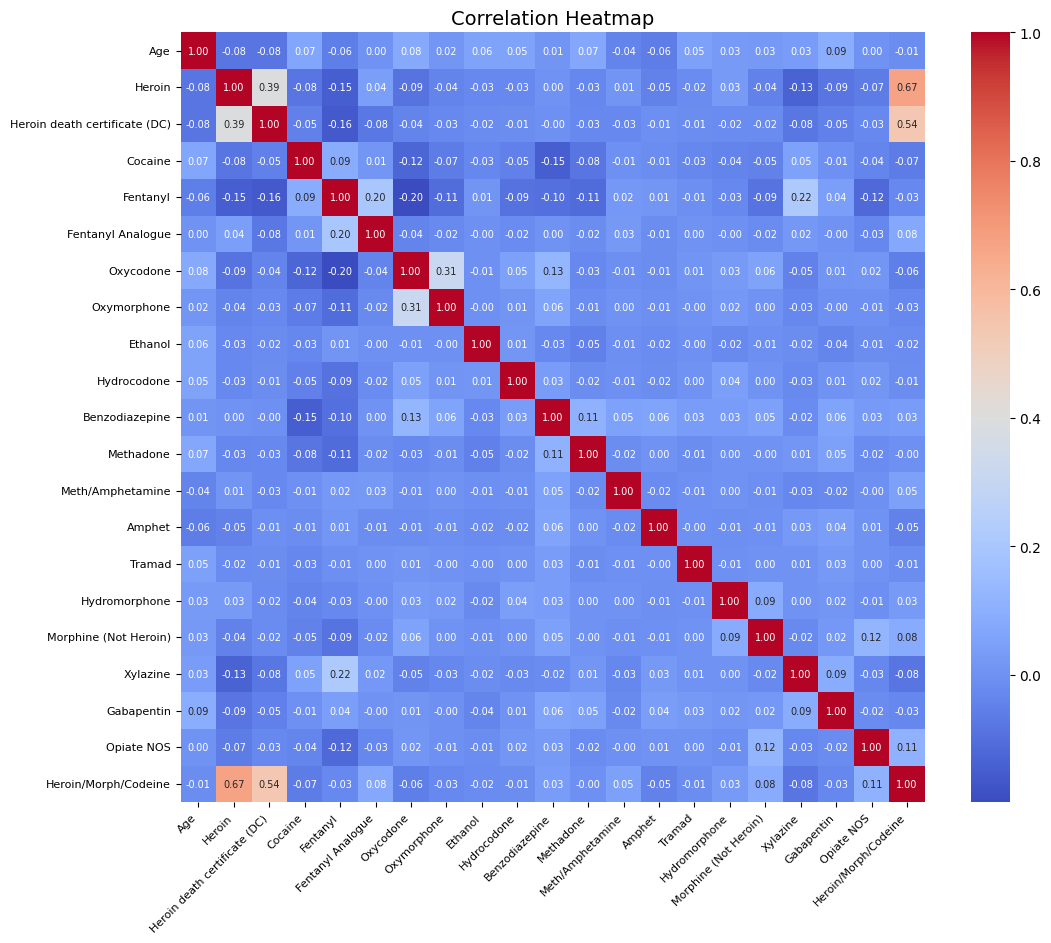

In [17]:
# Load dataset
file_path = "Filled_Accidental_drug_deaths.xlsx"
data = pd.read_excel(file_path)

# Convert "Y" values in substance columns to 1
substance_columns = ["Heroin", "Heroin death certificate (DC)","Cocaine","Fentanyl","Fentanyl Analogue","Oxycodone","Oxymorphone","Ethanol","Hydrocodone","Benzodiazepine","Methadone","Meth/Amphetamine","Amphet","Tramad","Hydromorphone","Morphine (Not Heroin)","Xylazine","Gabapentin","Opiate NOS","Heroin/Morph/Codeine","Other Opioid","Any Opioid"]
for col in substance_columns:
    if col in data.columns:
        data[col] = data[col].astype(str).str.strip().str.upper().map({'Y': 1}).fillna(0)

# Select numeric columns
numeric_data = data.select_dtypes(include=['number'])

if len(numeric_data.columns) > 1:
    # Compute correlation matrix
    correlation_matrix = numeric_data.corr()

    # Heatmap
    plt.figure(figsize=(12, 10))  # Increase figure size
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 7})  # Reduce font size
    plt.xticks(rotation=45, ha="right", fontsize=8)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=8)  # Reduce y-axis font size
    plt.title("Correlation Heatmap", fontsize=14)  # Adjust title size
    plt.show()
else:
    print("Not enough numeric columns for correlation analysis.")

**3. DATA TRANSFORMATION**

i) FEATURE ENGINEERING

In [18]:
# Load the dataset
df = pd.read_excel("Cleaned_v2_Accidental_drug_deaths.xlsx")

# Function to extract latitude and longitude
def extract_lat_lon(geo_column):
    if pd.isna(geo_column) or not isinstance(geo_column, str):
        return pd.Series([None, None])  # Return None for missing values
    match = re.search(r"\(([-\d.]+), ([-\d.]+)\)", geo_column)
    return pd.Series(match.groups()) if match else pd.Series([None, None])

# Apply extraction to each location column
for col in ["ResidenceCityGeo", "InjuryCityGeo", "DeathCityGeo"]:
    df[[f"{col}_Latitude", f"{col}_Longitude"]] = df[col].apply(extract_lat_lon)

# Fill missing values using mode for each column
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop original columns
df.drop(columns=["ResidenceCityGeo", "InjuryCityGeo", "DeathCityGeo"], inplace=True)

# Save cleaned dataset
df.to_excel("Cleaned_v3_Accidental_Drug_deaths.xlsx", index=False)

# Display sample output
print(df.head())

<ipython-input-18-349740ecde51>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-18-349740ecde51>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

         Date      Date Type  Age     Sex   Race Residence City  \
0  05/29/2012  Date of death   37    Male  Black       STAMFORD   
1  06/27/2012  Date of death   37    Male  White        NORWICH   
2  03/24/2014  Date of death   28    Male  White         HEBRON   
3  12/31/2014  Date of death   26  Female  White         BALTIC   
4  01/16/2016  Date of death   41    Male  White        SHELTON   

  Residence County Injury City Injury County Description of Injury  ...  \
0        FAIRFIELD    STAMFORD       Unknown           Cocaine Use  ...   
1       NEW LONDON     NORWICH       Unknown        Reason Unknown  ...   
2          Unknown      HEBRON       Unknown        Reason Unknown  ...   
3          Unknown     Unknown       Unknown        Reason Unknown  ...   
4        FAIRFIELD     SHELTON       Unknown        Reason Unknown  ...   

  Gabapentin Opiate NOS Heroin/Morph/Codeine          Other  \
0          0          0                    0  Not Specified   
1          0        

ii) STANDARDIZE "Age" COLUMN

In [19]:
# Convert Age column to numeric
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Fill missing Age values with median
age_median = df["Age"].median()
df["Age"].fillna(age_median, inplace=True)

# Initialize the scaler
scaler = StandardScaler()

# Standardize the Age column and store it in a new column
df["Standardized_Age"] = scaler.fit_transform(df[["Age"]])

# Save the updated dataset
df.to_excel("Final_Accidental_Drug_deaths.xlsx", index=False)


<ipython-input-19-3a6877a24eb0>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(age_median, inplace=True)


## **FINAL CLEANED DATASET**

In [20]:
# Load the data
uploaded = files.upload()
cleandata = list(uploaded.keys())[0]

# Read the uploaded file into a DataFrame
data = pd.read_excel(cleandata)

#Convert into a dataframe
df = pd.DataFrame(data)
df

Saving Final_Accidental_Drug_deaths.xlsx to Final_Accidental_Drug_deaths (1).xlsx


,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Injury City,Injury County,Description of Injury,...,Opiate NOS,Heroin/Morph/Codeine,Other,ResidenceCityGeo_Latitude,ResidenceCityGeo_Longitude,InjuryCityGeo_Latitude,InjuryCityGeo_Longitude,DeathCityGeo_Latitude,DeathCityGeo_Longitude,Standardized_Age
0,05/29/2012,Date of death,37,Male,Black,STAMFORD,FAIRFIELD,STAMFORD,Unknown,Cocaine Use,...,0,0,Not Specified,41.051924,-73.539475,41.051924,-73.539475,41.575155,-72.738288,-0.553051
1,06/27/2012,Date of death,37,Male,White,NORWICH,NEW LONDON,NORWICH,Unknown,Reason Unknown,...,0,0,Not Specified,41.524304,-72.075821,41.524304,-72.075821,41.524304,-72.075821,-0.553051
2,03/24/2014,Date of death,28,Male,White,HEBRON,Unknown,HEBRON,Unknown,Reason Unknown,...,0,0,Not Specified,41.658069,-72.366324,41.658069,-72.366324,41.632043,-72.461309,-1.262982
3,12/31/2014,Date of death,26,Female,White,BALTIC,Unknown,Unknown,Unknown,Reason Unknown,...,0,0,Not Specified,41.617221,-72.085031,41.575155,-72.738288,41.617221,-72.085031,-1.420745
4,01/16/2016,Date of death,41,Male,White,SHELTON,FAIRFIELD,SHELTON,Unknown,Reason Unknown,...,0,0,Not Specified,41.316843,-73.092968,41.316843,-73.092968,41.179195,-73.189476,-0.237526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11976,02/28/2023,Date of death,58,Female,White,NEW HAVEN,NEW HAVEN,NEW HAVEN,NEW HAVEN,Drug Use (General),...,0,0,Not Specified,41.308252,-72.924160,41.308252,-72.924160,41.573503,-72.738306,1.103455
11977,08/23/2023,Date of death,23,Male,White,NEW HAVEN,NEW HAVEN,NEW HAVEN,NEW HAVEN,Reason Unknown,...,0,0,Not Specified,41.308252,-72.924160,41.308252,-72.924160,41.573503,-72.738306,-1.657389
11978,01/30/2023,Date of death,46,Male,White,DANBURY,FAIRFIELD,DANBURY,FAIRFIELD,Reason Unknown,...,0,0,Not Specified,41.393666,-73.451539,41.393666,-73.451539,41.573503,-72.738306,0.156880
11979,09/25/2023,Date of death,44,Male,White,HARTFORD,HARTFORD,HARTFORD,HARTFORD,Drug Use (General),...,0,0,Not Specified,41.765775,-72.673356,41.765775,-72.673356,41.573503,-72.738306,-0.000882


## **FINAL OVERVIEW OF MISSING VALUES AFTER PRE-PROCESSING**



In [21]:
# Load the dataset
df = pd.read_excel("Final_Accidental_Drug_deaths.xlsx")
# Confirm missing values are handled
print("Missing Values after handling:\n", df.isnull().sum())

Missing Values after handling:
 Date                             0
Date Type                        0
Age                              0
Sex                              0
Race                             0
Residence City                   0
Residence County                 0
Injury City                      0
Injury County                    0
Description of Injury            0
Death City                       0
Death County                     0
Death Place                      0
Other Significant Conditions     0
Heroin                           0
Heroin death certificate (DC)    0
Cocaine                          0
Fentanyl                         0
Fentanyl Analogue                0
Oxycodone                        0
Oxymorphone                      0
Ethanol                          0
Hydrocodone                      0
Benzodiazepine                   0
Methadone                        0
Meth/Amphetamine                 0
Amphet                           0
Tramad                 

###DATA VISUALIZATION

### **BEFORE PRE-PROCESSING**

#### 1. Identifying the Youngest and Oldest Victims in Overdose Cases (BOXPLOT)

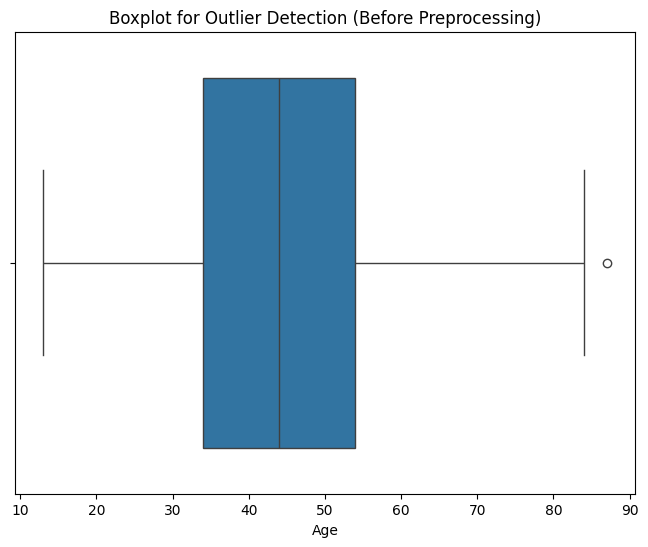

In [22]:
# Load dataset
file_path = "Accidental_Drug_Related_Deaths.csv"
data = pd.read_csv(file_path)

# Boxplot to visualize outliers in the Age column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age'])

# Title and display
plt.title('Boxplot for Outlier Detection (Before Preprocessing)')
plt.show()

#### 2. Identifying the Most Common Substances in Drug-Related Deaths (Bar Chart)

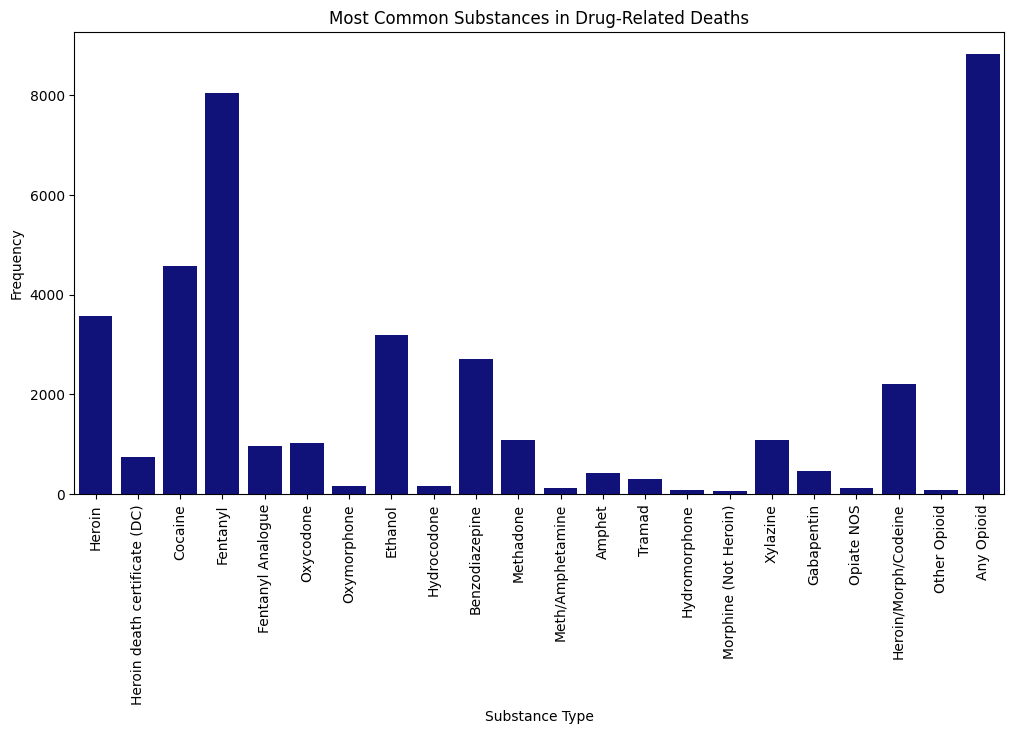

In [23]:
# Load dataset
file_path = 'Accidental_Drug_Related_Deaths.csv'
data = pd.read_csv(file_path)

# List of substance-related columns
substances = ["Heroin", "Heroin death certificate (DC)", "Cocaine", "Fentanyl", "Fentanyl Analogue",
              "Oxycodone", "Oxymorphone", "Ethanol", "Hydrocodone", "Benzodiazepine", "Methadone",
              "Meth/Amphetamine", "Amphet", "Tramad", "Hydromorphone", "Morphine (Not Heroin)",
              "Xylazine", "Gabapentin", "Opiate NOS", "Heroin/Morph/Codeine", "Other Opioid", "Any Opioid"]

# Check which substance columns exist in the dataset
existing_substances = [col for col in substances if col in data.columns]

# Convert all values to lowercase and strip spaces
for col in existing_substances:
    data[col] = data[col].astype(str).str.strip().str.lower()

# Count occurrences of "Y" in each substance column
substance_counts = data[existing_substances].apply(lambda x: (x == 'y').sum())

# Bar chart visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=substance_counts.index, y=substance_counts.values, color='darkblue')

# Titles and labels
plt.title("Most Common Substances in Drug-Related Deaths")
plt.xlabel("Substance Type")
plt.ylabel("Frequency")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.show()

#### 3. Fentanyl, Heroin & Cocaine Consumption by Age Group (Stacked Bar chart)

<ipython-input-24-6c1e2fdd8f0e>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_substance_counts = data.groupby("Age Group")[substances].sum()


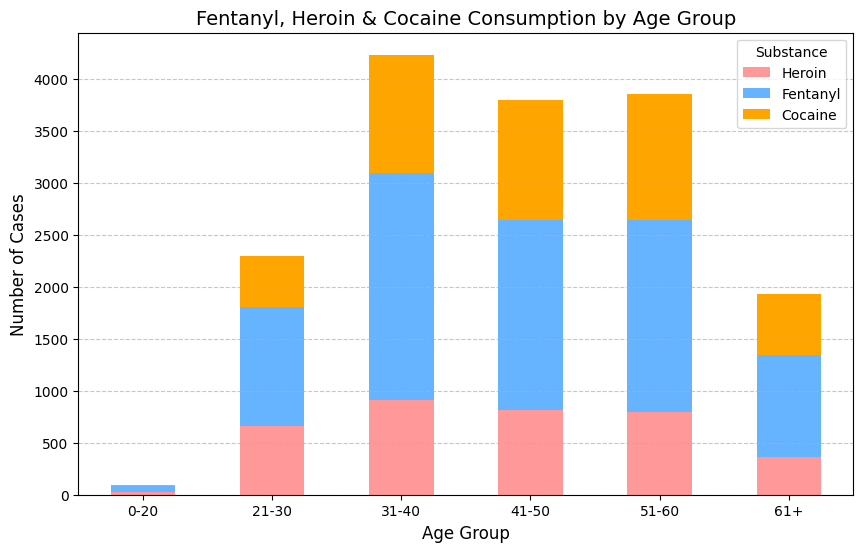

In [24]:
# Load dataset
file_path = "Accidental_Drug_Related_Deaths.csv"
data = pd.read_csv(file_path)

# Define substances
substances = ["Heroin", "Fentanyl","Cocaine"]

# Create Age Groups
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ["0-20", "21-30", "31-40", "41-50", "51-60", "61+"]
data["Age Group"] = pd.cut(data["Age"], bins=bins, labels=labels, right=False)

# Convert "Y" values to 1, else 0
for col in substances:
    data[col] = data[col].astype(str).str.strip().str.upper().map({'Y': 1}).fillna(0)

# Count Fentanyl & Heroin usage per age group
age_substance_counts = data.groupby("Age Group")[substances].sum()

# Plot stacked bar chart
ax = age_substance_counts.plot(kind="bar", stacked=True, figsize=(10, 6), color=["#FF9999", "#66B3FF","#FFA500"])

# Titles and labels
plt.title("Fentanyl, Heroin & Cocaine Consumption by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Substance", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show chart
plt.show()

####4. Examining Repeated Overdose Cases from Residence Data (Barchart)

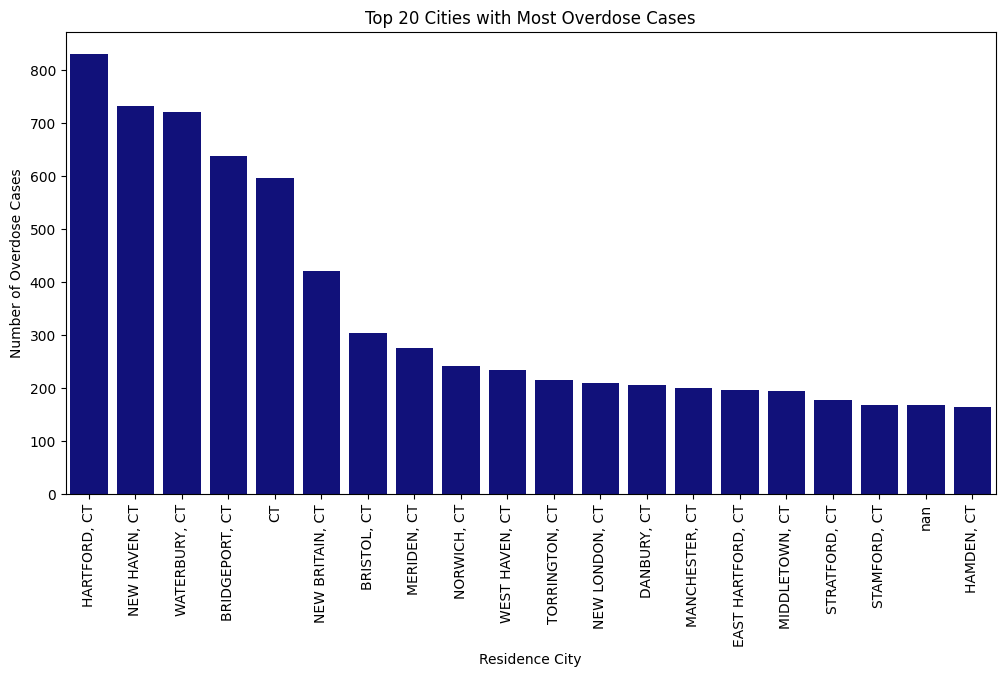

In [25]:
# Load dataset
file_path = "Accidental_Drug_Related_Deaths.csv"
data = pd.read_csv(file_path)

# Check if "ResidenceCityGeo" exists in dataset
if "ResidenceCityGeo" in data.columns:
    # Extract city names from "ResidenceCityGeo" column (everything before the coordinates)
    data["Residence City"] = data["ResidenceCityGeo"].apply(lambda x: re.split(r'\s*\(', str(x))[0])

    # Count the number of overdose cases per city
    city_counts = data["Residence City"].value_counts().head(20)  # Top 20 cities

    # Plot bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=city_counts.index, y=city_counts.values, color='darkblue')

    # Titles & Labels
    plt.title("Top 20 Cities with Most Overdose Cases")
    plt.xlabel("Residence City")
    plt.ylabel("Number of Overdose Cases")
    plt.xticks(rotation=90)  # Rotate labels for better visibility
    plt.show()

### **AFTER PRE-PROCESSING**

####1. Identifying the Youngest and Oldest Victims in Overdose Cases (Histogram)

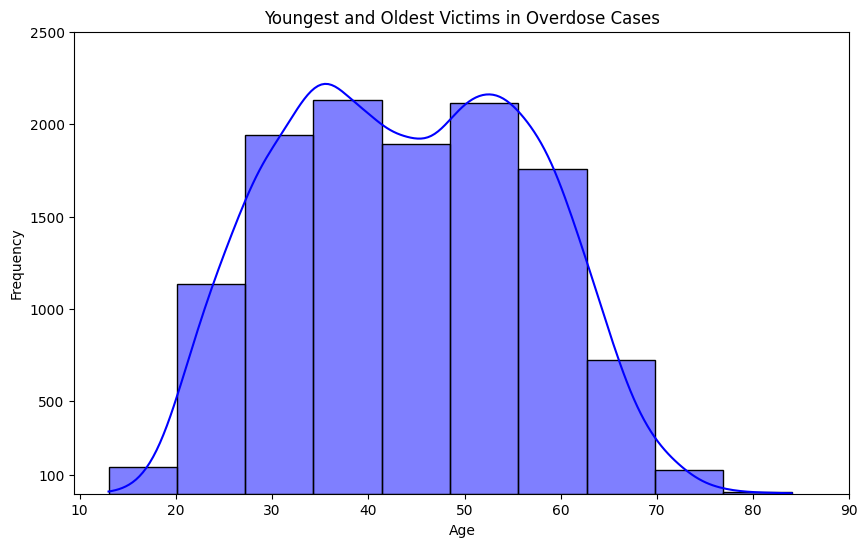

In [26]:
# Load cleaned dataset
file_path = "Final_Accidental_Drug_deaths.xlsx"
data = pd.read_excel(file_path)

# Convert 'Age' column to numeric, handling errors
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Drop NaN values in 'Age' column
data = data.dropna(subset=['Age'])

# Remove the outlier (Age = 87)
data = data[data['Age'] != 87]

# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram with KDE curve
sns.histplot(data['Age'], bins=10, kde=True, color='blue', edgecolor='black')

# Set x-axis labels
plt.xticks(range(10, 100, 10))

# Set y-axis labels manually
plt.yticks([100, 500, 1000, 1500, 2000, 2500])

# Labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Youngest and Oldest Victims in Overdose Cases')

# Show plot
plt.show()

####2. Identifying the Most Common Substances in Drug-Related Deaths (Dual-Bar Chart)

<Figure size 1200x600 with 0 Axes>

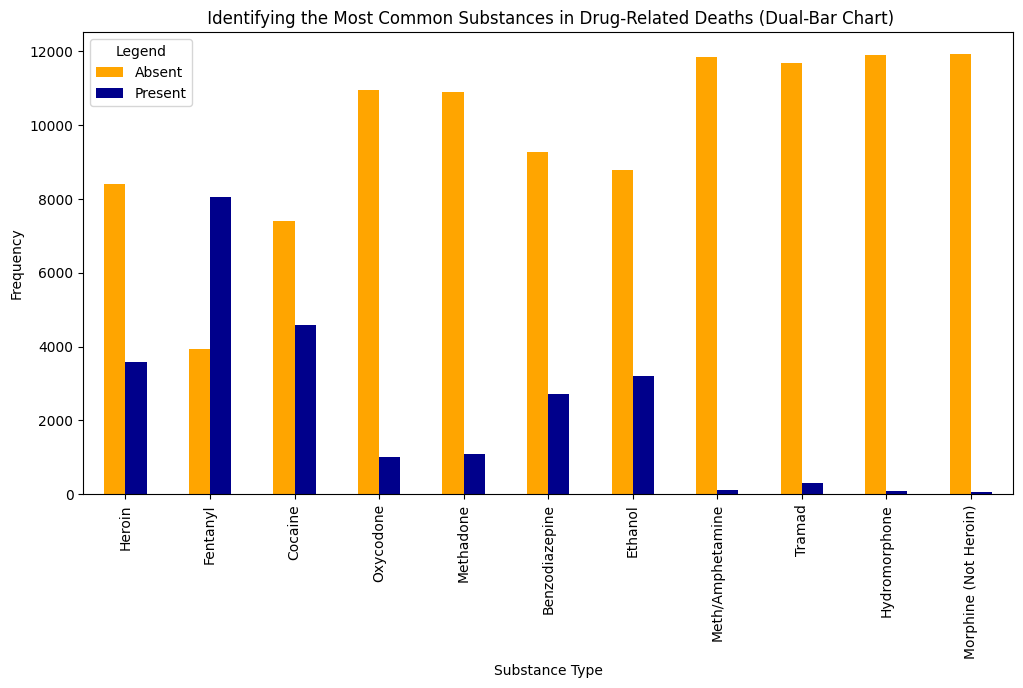

In [27]:
# Load cleaned dataset
file_path = "Final_Accidental_Drug_deaths.xlsx"
data = pd.read_excel(file_path)

# List of substance-related columns
substances = ["Heroin", "Fentanyl", "Cocaine", "Oxycodone", "Methadone", "Benzodiazepine",
              "Ethanol", "Meth/Amphetamine", "Tramad", "Hydromorphone", "Morphine (Not Heroin)"]

# Count the number of 1s (presence) and 0s (absence) for each substance
substance_counts = data[substances].apply(pd.Series.value_counts).fillna(0)

# Rename index for clarity
substance_counts.index = ["Absent (0)", "Present (1)"]

# Plot the dual bar chart
plt.figure(figsize=(12, 6))
substance_counts.T.plot(kind="bar", stacked=False, figsize=(12, 6), color=["orange", "darkblue"])

# Titles and labels
plt.title(" Identifying the Most Common Substances in Drug-Related Deaths (Dual-Bar Chart)")
plt.xlabel("Substance Type")
plt.ylabel("Frequency")
plt.xticks(rotation=90)  # Rotate labels for readability
plt.legend(title="Legend", labels=["Absent", "Present"])

# Show the plot
plt.show()

#### 3. Fentanyl, Heroin & Cocaine Consumption by Age Group (Line chart)

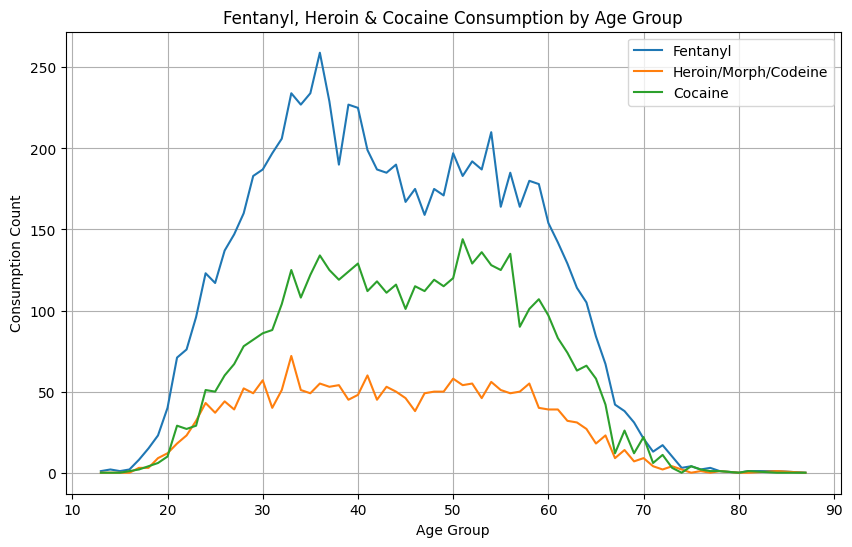

In [28]:
# Load the dataset
file_path = "Final_Accidental_Drug_deaths.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert Age column to numeric, dropping non-numeric values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age'])

drug_columns = ['Fentanyl', 'Heroin/Morph/Codeine', 'Cocaine']

df_grouped = df.groupby('Age')[drug_columns].sum()

# Plot the line chart
plt.figure(figsize=(10, 6))
for drug in drug_columns:
    plt.plot(df_grouped.index, df_grouped[drug], label=drug)

plt.xlabel("Age Group")
plt.ylabel("Consumption Count")
plt.title("Fentanyl, Heroin & Cocaine Consumption by Age Group")
plt.legend()
plt.grid()
plt.show()

####4. Examining Repeated Overdose Cases from Residence Data (Piechart)

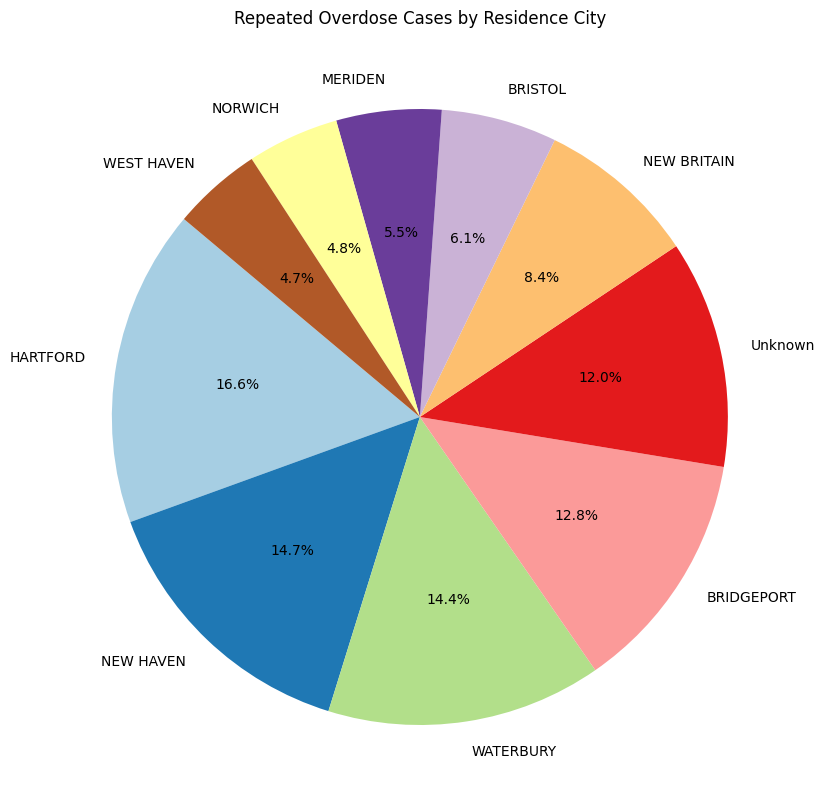

In [29]:
# Load the dataset
file_path = "Final_Accidental_Drug_deaths.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Count repeated overdose cases by Residence City
df_grouped = df['Residence City'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 10))
df_grouped.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Paired')

plt.ylabel("")
plt.title("Repeated Overdose Cases by Residence City")
plt.show()